# Project Description

This project involves analyzing user activity data from Codeup web logs to gain insights into user behavior and curriculum usage. The data includes information about the lessons accessed, the cohorts to which users belong, the times of access, and other related details. The analysis will focus on identifying patterns and anomalies in the data that can answer specific questions about user engagement, curriculum relevance, and potential security issues.

# Project Goal

The goal of the project is to provide answers to at least 5 of the 7 questions that were provided on an email before the board meeting on Friday morning.

# Imports

In [1]:
# standard imports
import numpy as np
import pandas as pd

# visualize
import matplotlib.pyplot as plt
import seaborn as sns

# my imports
import wrangle as w

# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

# Acquire

- Build organization repository named anomoly_detection and invite members.  
- Acquired the dataset from MySql Server by creating a query that 
joins the curriculum logs and cohorts on cohort_id.  
- Build env.py file to acquire the dataset from MySql server and a .gitignore to avoid sharing personal information.   
- Use python environment of choice (recommend jupyter lab) and created a CSV file.
- Original dataset contained 847,330 rows and 15 columns.

In [2]:
# acquires the dataset from MySQL and creates a logs.csv file
# the data contains 847,330 rows and 15 columns.
df = w.get_logs_data()

csv file found and loaded


# Data Summary

In [3]:
w.data_summary(df)

data shape: (847330, 15)


,data type,#missing,%missing,#unique,count,mean,std,min,25%,50%,75%,max,first_value,second_value,third_value
date,object,0,0.000000,1182,847330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-26,2018-01-26,2018-01-26
time,object,0,0.000000,72331,847330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09:55:03,09:56:02,09:56:05
path,object,1,0.000118,2224,847329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/,java-ii,java-ii/object-oriented-programming
user_id,int64,0,0.000000,911,847330.0,456.707344,250.734201,1.0,263.0,476.0,648.0,981.0,1,1,1
cohort_id,float64,0,0.000000,47,847330.0,48.501049,32.795482,1.0,28.0,33.0,57.0,139.0,8.0,8.0,8.0
ip,object,0,0.000000,5200,847330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.105.19.61,97.105.19.61,97.105.19.61
id,int64,0,0.000000,47,847330.0,48.501049,32.795482,1.0,28.0,33.0,57.0,139.0,8,8,8
name,object,0,0.000000,47,847330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hampton,Hampton,Hampton
slack,object,0,0.000000,46,847330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,#hampton,#hampton,#hampton
start_date,object,0,0.000000,44,847330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-22,2015-09-22,2015-09-22


In [4]:
df.head()

,date,time,path,user_id,cohort_id,ip,id,name,slack,start_date,end_date,created_at,updated_at,deleted_at,program_id
0,2018-01-26,09:55:03,/,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
1,2018-01-26,09:56:02,java-ii,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
2,2018-01-26,09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
3,2018-01-26,09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,8,Hampton,#hampton,2015-09-22,2016-02-06,2016-06-14 19:52:26,2016-06-14 19:52:26,NaN,1
4,2018-01-26,09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,22,Teddy,#teddy,2018-01-08,2018-05-17,2018-01-08 13:59:10,2018-01-08 13:59:10,NaN,2


# Data Preparation


- The following columns were dropped id, slack, deleted_at
- The 'path' column has 1 null value. the null was eventually dropped using drop.na
- The 'unnamed: 0' column has the most unique values (847330), which suggests that it might be an index column.
- The 'user_id' column has 911 unique values, which suggests that there are 911 unique users in the dataset.
- The 'cohort_id' and 'name' columns each have 47 unique values, which suggests that there are 47 unique cohorts in the dataset.
- The 'ip' column has 5200 unique values, which suggests that there are 5200 unique IP addresses in the dataset.
    after preparation dataset contained

In [5]:
col_to_remove = ['id','slack','deleted_at']

In [6]:
df = w.data_prep(df, col_to_remove, prop_required_columns=0.5, prop_required_rows=0.75)

In [7]:
# Don't add it to the function. It will remove more than the nulls
# drop any nulls in the dataset
df = df.dropna()

# Data Summary After Preparation

In [8]:
w.data_summary(df)

data shape: (847329, 12)


,data type,#missing,%missing,#unique,count,mean,std,min,25%,50%,75%,max,first_value,second_value,third_value
date,datetime64[ns],0,0.0,1182,847329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018-01-26 00:00:00,2018-01-26 00:00:00,2018-01-26 00:00:00
time,object,0,0.0,72331,847329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,09:55:03,09:56:02,09:56:05
path,object,0,0.0,2224,847329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/,java-ii,java-ii/object-oriented-programming
user_id,int64,0,0.0,911,847329.0,456.707192,250.734309,1.0,263.0,476.0,648.0,981.0,1,1,1
cohort_id,float64,0,0.0,47,847329.0,48.501042,32.795501,1.0,28.0,33.0,57.0,139.0,8.0,8.0,8.0
ip,object,0,0.0,5200,847329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.105.19.61,97.105.19.61,97.105.19.61
cohort_name,object,0,0.0,47,847329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Hampton,Hampton,Hampton
start_date,object,0,0.0,44,847329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015-09-22,2015-09-22,2015-09-22
end_date,object,0,0.0,45,847329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-02-06,2016-02-06,2016-02-06
created_at,object,0,0.0,37,847329,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2016-06-14 19:52:26,2016-06-14 19:52:26,2016-06-14 19:52:26


# Questions

## 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

<div class="alert alert-block alert-success"> 
<b>Q1: Answer</b>

Full Stack PHP: content/html-css and content/laravel/intro
    
Full Stack JAVA: mysql/tables
    
Data Science: 1-fundamentals/modern-data-scientist.jpg, classification/scale_features_or_not.svg, fundamentals/modern-data-scientist.jpg, 6-regression/1-overview, classification/overview
    
Front_End Web Dev: content/html-css
</div>

In [9]:
# Use the function to find the most accessed lesson per program
w.most_accessed_lesson(df)

,program,page
0,full_stack_java_php,"['content/html-css', 'content/laravel/intro']"
0,full_stack_java_java,['mysql/tables']
0,datascience,"['1-fundamentals/modern-data-scientist.jpg', '..."
0,front_end_web_dev,['content/html-css']


## 2. Is there a cohort that referred to a lesson significantly more than other cohorts seemed to gloss over?

<div class="alert alert-block alert-success"> 
<b>Q2: answer</b>

Full Stack PHP: Cohort 14 - spring/fundamentals/repositories

Full Stack JAVA:  Cohort 28 - jquery/ajax/weather-map

Data Science: Cohort 59 - classification/overview

Front End Web Dev: only had one cohort

</div>

In [10]:
# Use the function to find the most referred lesson per cohort
w.most_referred_lesson(df)

,path,cohort_id,user_id,cohort,program
1888,spring/fundamentals/repositories,14.0,115,Lassen,full_stack_java_php
4506,jquery/ajax/weather-map,28.0,1050,Staff,full_stack_java_java
1169,classification/overview,59.0,1109,Darden,datascience


## 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

<div class="alert alert-block alert-success"> 
<b>Q3: answer</b>

Here is the count of users that hardly visit the curriculum. 
    
• 13 users visit the curriculum 1 time    
• 4 users visit the curriculum 2 times    
• 5 users visit the curriculum 3 times    
• 4 users visit the curriculum 4 times    
• 5 users visit the curriculum 5 times   
• 2 users visit the curriculum 6 times    
• 1 user visit the curriculum 7 times    
• 3 users visit the curriculum 8 times    
• 2 users visit the curriculum 9 times

There is nothing that stands out for each of these students.   
</div>

In [11]:
# Use the function to find students who, when active, hardly access the curriculum
less_active = w.less_active_students(df)
less_active.head(20)

,user_id,count,date,cohort_name,program_id,ip
0,66,1,2018-01-29,Kings,full_stack_php,67.198.116.192
75,212,1,2018-06-19,Arches,full_stack_php,170.248.173.247
66,165,1,2018-03-30,Niagara,full_stack_java,24.243.3.200
112,593,1,2020-02-17,Lassen,full_stack_php,167.24.104.150
113,619,1,2020-03-23,Ganymede,full_stack_java,97.105.19.58
114,649,1,2020-05-06,Everglades,full_stack_php,70.125.150.41
115,652,1,2020-05-18,Staff,full_stack_java,71.150.217.33
111,592,1,2020-02-07,Staff,full_stack_java,97.105.19.58
65,163,1,2018-03-29,Quincy,full_stack_php,192.171.117.234
125,879,1,2021-01-26,Marco,full_stack_java,136.50.50.187


## 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses?

<div class="alert alert-block alert-success"> 
<b>Q4: answer</b>
    
Three users stand out with a number of occurrences greater than 1000 counts. User 11, 53, 64 are staff members as they have been with the company since sinse day one. 
    
It doesn't appear that there is web-scrapping. Also, the 5 top IP addresses were invistigated and we found no suspicious activity. 
</div>

## User investigation

In [12]:
# Use the function to find suspicious activity
w.find_suspicious_activity(df)

,user_id,count
10,11,17913
51,53,12329
56,64,16322


In [13]:
df_date = df.set_index(df.date)
df_date = df_date.sort_index()
df_date['user_id'].resample('d').count()

date
2018-01-26     533
2018-01-27     230
2018-01-28     168
2018-01-29     783
2018-01-30     614
              ... 
2021-04-17     430
2021-04-18     651
2021-04-19    2156
2021-04-20    1921
2021-04-21    1107
Freq: D, Name: user_id, Length: 1182, dtype: int64

In [14]:
# df_users = df.group(by='user_id')
df_suss = df_date.groupby(['user_id']).size().reset_index(name='count')
df_suss

,user_id,count
0,1,7404
1,2,1541
2,3,1562
3,4,692
4,5,1701
...,...,...
906,977,86
907,978,55
908,979,127
909,980,3


In [15]:
user_dates = pd.DataFrame(df_date.user_id)

In [16]:
user_d_cnts = user_dates.groupby(['user_id']).resample('d').count()
user_d_cnts

user_id
user_id date               
1       2018-01-26        7
        2018-01-27        1
        2018-01-28        0
        2018-01-29        6
        2018-01-30        5
...                     ...
980     2021-04-18        0
        2021-04-19        1
981     2021-04-19       25
        2021-04-20        9
        2021-04-21        8

[247876 rows x 1 columns]

In [17]:
user_d_cnts = user_d_cnts.rename(columns={'user_id':'count'})

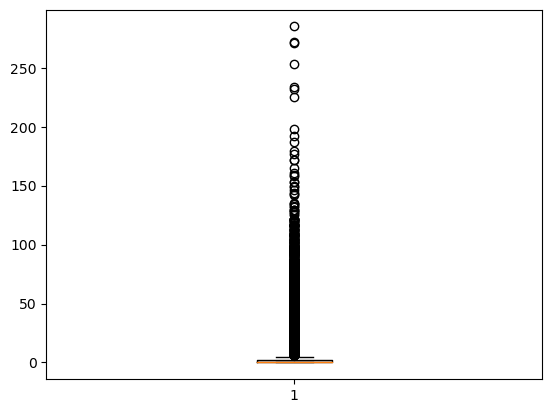

In [18]:
# exploring the mean of users 
plt.boxplot(user_d_cnts['count'])
plt.show()

#### Exploring a single user

In [19]:
# parameters the find_anomalies function
user=513
span=720
k=6

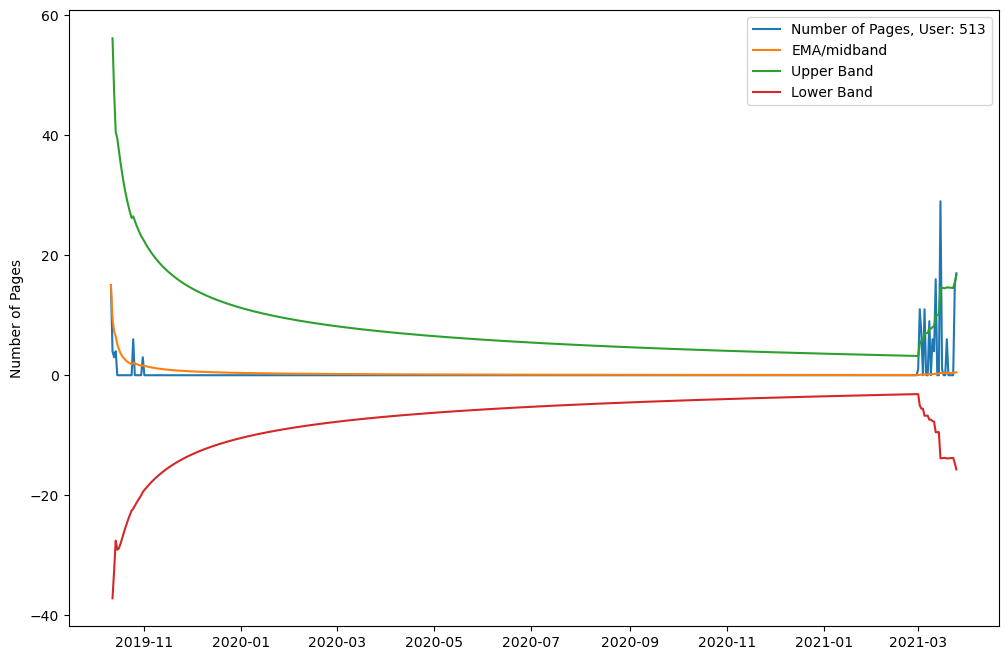

,pages_one_user,midband,ub,lb,pct_b,user_id
date,,,,,,
2021-03-02,11,0.075680,5.177489,-5.026129,1.570632,513
2021-03-03,7,0.101037,5.779524,-5.577450,1.107465,513
2021-03-05,11,0.140510,7.041435,-6.760414,1.286814,513
2021-03-08,9,0.171791,7.747957,-7.404375,1.082630,513
2021-03-12,16,0.263610,10.033675,-9.506455,1.305337,513
2021-03-15,29,0.365849,14.579788,-13.848091,1.507256,513
2021-03-25,17,0.492428,16.680453,-15.695596,1.009870,513


In [20]:
# finds anomalies for one user
w.find_anomalies(df, user, span, k, plot=True)

#### Exploring all user_id's

In [21]:
# finds anomalies for all users
df_find_all = w.find_all_anomalies(df, span, k)
df_find_all
df_find_all.sort_values(by='pages_one_user', ascending=False)

,pages_one_user,midband,ub,lb,pct_b,user_id
date,,,,,,
2020-07-22,285,16.576802,169.787184,-136.633580,1.375995,11
2020-04-16,271,23.997334,265.692409,-217.697742,1.010980,570
2019-07-25,253,19.452264,242.248320,-203.343793,1.024129,422
2020-04-05,232,20.533960,203.269087,-162.201167,1.078614,570
2018-06-02,198,13.002648,179.867268,-153.861972,1.054334,138
...,...,...,...,...,...,...
2020-08-26,3,0.026511,2.452654,-2.399632,1.112802,147
2020-11-11,2,0.049102,1.773110,-1.674907,1.065803,746
2020-12-07,1,0.005740,0.764649,-0.753169,1.155058,143


In [22]:
# exploring a user with anomalies
df[df.user_id == 11].date.min()

Timestamp('2018-01-26 00:00:00')

In [23]:
# exploring users and dates
df_11 = df[(df.user_id == 11) & (df.date == '2020-07-22')]
df_11

,date,time,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,created_at,updated_at,program_id
580371,2020-07-22,10:19:49,/,11,28.0,76.185.145.231,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java
580372,2020-07-22,10:19:50,7-classification/1-overview,11,28.0,76.185.145.231,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java
580373,2020-07-22,10:19:51,3-sql/1-mysql-overview,11,28.0,76.185.145.231,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java
580374,2020-07-22,10:19:53,3-sql/7-functions,11,28.0,76.185.145.231,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java
580375,2020-07-22,10:19:53,3-sql/7-functions,11,28.0,76.185.145.231,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java
...,...,...,...,...,...,...,...,...,...,...,...,...
581260,2020-07-22,18:04:23,anomaly-detection/detecting-with-clustering,11,28.0,76.185.145.231,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java
581261,2020-07-22,18:09:59,classification/overview,11,28.0,76.185.145.231,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java
581262,2020-07-22,18:10:31,/,11,28.0,76.185.145.231,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java
581263,2020-07-22,18:10:33,classification/overview,11,28.0,76.185.145.231,Staff,2014-02-04,2014-02-04,2018-12-06 17:04:19,2018-12-06 17:04:19,full_stack_java


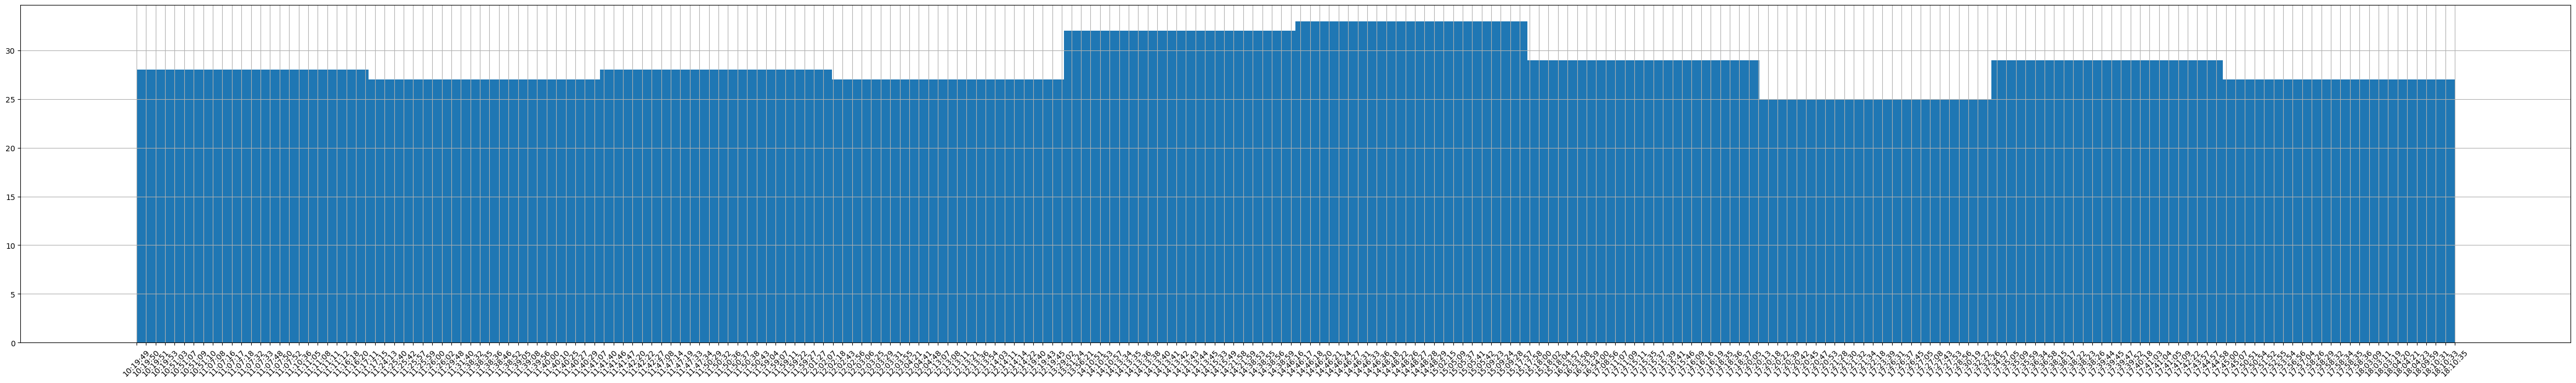

In [24]:
plt.figure(figsize=(60,8))
df_11.time.hist()
plt.xticks(rotation =45)
plt.show()

## IP address investigation

In [25]:
# Calculate the count and percent for each IP
ip_count_df = df['ip'].value_counts().reset_index().rename(columns={'index': 'ip', 'ip': 'count'})
ip_count_df['percent'] = (ip_count_df['count'] / df.shape[0]) * 100
ip_count_df.head()

,ip,count,percent
0,97.105.19.58,268648,31.705276
1,97.105.19.61,60530,7.143624
2,192.171.117.210,9124,1.076795
3,71.150.217.33,6791,0.801460
4,76.185.145.231,4754,0.561057


In [26]:
df[df.ip == '97.105.19.58'].user_id.value_counts()

11     7049
64     5690
53     4895
314    3474
1      3099
       ... 
619       1
592       1
278       1
461       1
629       1
Name: user_id, Length: 377, dtype: int64

In [27]:
# exploring a single ip address
df[df.ip == '97.105.19.58']

,date,time,path,user_id,cohort_id,ip,cohort_name,start_date,end_date,created_at,updated_at,program_id
82285,2018-07-16,07:51:57,javascript-ii/promises,211,1.0,97.105.19.58,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
82286,2018-07-16,07:58:03,javascript-ii/map-filter-reduce,211,1.0,97.105.19.58,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
82287,2018-07-16,07:59:50,javascript-ii/promises,211,1.0,97.105.19.58,Arches,2014-02-04,2014-04-22,2016-06-14 19:52:26,2016-06-14 19:52:26,full_stack_php
82288,2018-07-16,08:07:37,index.html,53,14.0,97.105.19.58,Lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,full_stack_php
82289,2018-07-16,08:07:41,javascript-ii,53,14.0,97.105.19.58,Lassen,2016-07-18,2016-11-10,2016-07-18 19:06:27,2016-07-18 19:06:27,full_stack_php
...,...,...,...,...,...,...,...,...,...,...,...,...
463573,2020-03-23,15:10:09,toc,625,57.0,97.105.19.58,Ganymede,2020-03-23,2020-08-20,2020-03-23 17:52:16,2020-03-23 17:52:16,full_stack_java
463575,2020-03-23,15:10:18,toc,623,57.0,97.105.19.58,Ganymede,2020-03-23,2020-08-20,2020-03-23 17:52:16,2020-03-23 17:52:16,full_stack_java
463578,2020-03-23,15:20:39,/,627,57.0,97.105.19.58,Ganymede,2020-03-23,2020-08-20,2020-03-23 17:52:16,2020-03-23 17:52:16,full_stack_java
463583,2020-03-23,15:24:54,/,628,57.0,97.105.19.58,Ganymede,2020-03-23,2020-08-20,2020-03-23 17:52:16,2020-03-23 17:52:16,full_stack_java


#### More exploration of IP addresses

In [28]:
ips = pd.DataFrame(df_date.ip)

In [29]:
ip_d_cnts = ips.groupby(['ip']).resample('d').count()
ip_d_cnts

ip
ip             date          
100.11.170.135 2020-07-20  19
               2020-07-21  15
               2020-07-22   2
               2020-07-23  33
               2020-07-24  10
...                        ..
99.98.36.168   2019-03-08   5
               2019-03-09   0
               2019-03-10   2
               2019-03-11   3
               2019-03-12   2

[352891 rows x 1 columns]

## 5. At some point in 2019, the ability for students and alumni to access both curriculums (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

<div class="alert alert-block alert-success"> 
<b>Q5: answer</b>
    
During our investigation it was found that only staff members have access to the curriculums. Also, students don't have access to both curriculums with the exception of user_id# 143 that has access to the Data Sciences and Full Stack Java curriculums. 
</div>

In [30]:
# Use the function to find evidence of students and alumni accessing 
# both curriculums before 2019
w.find_cross_access_before_2019(df).groupby(['user_id', 'program_id']).sum()

count
user_id program_id            
1       full_stack_java     38
        full_stack_php    1617
11      full_stack_java    143
        full_stack_php    2735
53      full_stack_java    141
        full_stack_php    5195
64      full_stack_java    129
        full_stack_php    3767
118     full_stack_java   1424
        full_stack_php      46
146     full_stack_java      9
        full_stack_php      63
211     full_stack_java     78
        full_stack_php    1065
312     full_stack_java    131
        full_stack_php     116
314     full_stack_java    372
        full_stack_php     153

In [31]:
# Use the function to find evidence of students and alumni accessing 
# both curriculums after 2019
w.find_cross_access_after_2019(df).groupby(['user_id', 'program_id']).sum()

count
user_id program_id            
37      full_stack_java    374
        full_stack_php       4
53      full_stack_java   3991
        full_stack_php    3002
143     data_science       808
        full_stack_java     12
148     full_stack_java     26
        full_stack_php      31
314     full_stack_java   4245
        full_stack_php    3013
419     full_stack_java   2494
        full_stack_php     383
428     full_stack_java   5819
        full_stack_php      78
480     data_science      1047
        full_stack_java   1256
513     full_stack_java    132
        full_stack_php      36
581     data_science      3473
        full_stack_java   2961
895     data_science       364
        full_stack_java      6

#### Exploring user_id # 143 (it's believe that he/she is a student)

In [32]:
# parameters the find_anomalies function
user=143
span=720
k=6

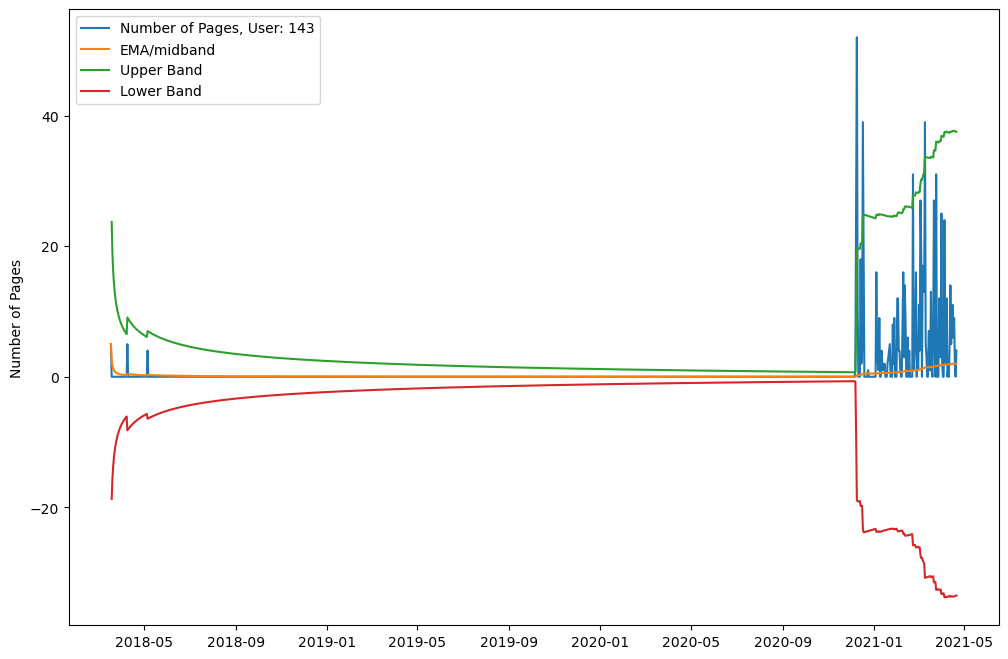

,pages_one_user,midband,ub,lb,pct_b,user_id
date,,,,,,
2020-12-07,1,0.005740,0.764649,-0.753169,1.155058,143
2020-12-08,27,0.085629,8.923162,-8.751904,2.022731,143
2020-12-09,52,0.239240,19.332654,-18.854174,1.855461,143
2020-12-17,39,0.451147,24.152031,-23.249737,1.313237,143
2021-02-22,31,0.968284,27.771470,-25.834902,1.060227,143
2021-03-10,39,1.441751,33.694481,-30.810979,1.082249,143


In [33]:
# finds anomalies for one user
w.find_anomalies(df, user, span, k, plot=True)

## 7. Which lessons are least accessed?

<div class="alert alert-block alert-success"> 
<b>Q7: answer</b>

Below are the least accessed lessons per program.    
Front_End_Web_Dev: content/html-css/gitbook/images/favicon.ico    
Data Science: %20https://github.com/RaulCPena   
Full Stack_JAVA: content/loops.html   
Full Stack_PHP: content/loops.html   
</div>

In [34]:
# Use the function to find the least accessed lessons
w.find_least_accessed_lessons(df)

,path,program,count
323,content/loops.html,full_stack_java_php,1
323,content/loops.html,full_stack_java_php,1
0,%20https://github.com/RaulCPena,datascience,1
2,content/html-css/gitbook/images/favicon.ico,front_end_web_dev,1


<div class="alert alert-block alert-info"> 
<b>Summary of Findings</b>


</div>

There was not sufficent time to evaluate the different file path names to determine if they were a lesson make this sound better

There is suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be. 

We can infer that certain lessons within the Full_stack_java_php, Full_stack_java_java, Datascience, and Front_end_web_dev categories are consistently popular or require more attention. 

Students Hardly Accessing Curriculum: User 11 accessed the curriculum 17,913 times, while users 53 and 64 accessed it 12,329 and 16,322 times, respectively.

Suspicious Activity: User 11 accessed the curriculum 17,913 times, while users 53 and 64 accessed it 12,329 and 16,322 times, respectively, indicating potential unauthorized access.

Cross-Program Access: Users 37 and 53 accessed both Program 1 and Program 2, indicating engagement across multiple curriculums.

Grad Referenced Topics: Post-graduation, graduates consistently refer to topics like '/', '1-fundamentals/1.1-intro-to-data-science', '1-fundamentals/AI-ML-DL-timeline.jpg', '1-fundamentals/modern-data-scientist.jpg', and '1-fundamentals/1.2-data-science-pipeline', emphasizing their ongoing relevance.

Least Accessed Lessons: Cohort-specific analysis highlights specific lessons that have been least accessed by certain cohorts.

No Negative Cohort IDs: The 'cohort_id' column contains no negative values, ensuring data integrity and absence of errors.

<div class="alert alert-block alert-info"> 
<b>Recommendations and Next Steps: </b>


</div>

Based on the analysis, provide recommendations and next steps. 

This could include:  

• Monitoring the IP addresses identified as anomalies for potential security threats.  
• Investigating the reasons for users accessing the curriculum less than a certain threshold. This could indicate issues with user engagement or potential technical problems.   
• If there are frequent errors (like 404 errors), investigate the cause and fix the issues.   
• If there are peak times of website access, ensure that the server can handle the load during these times.
